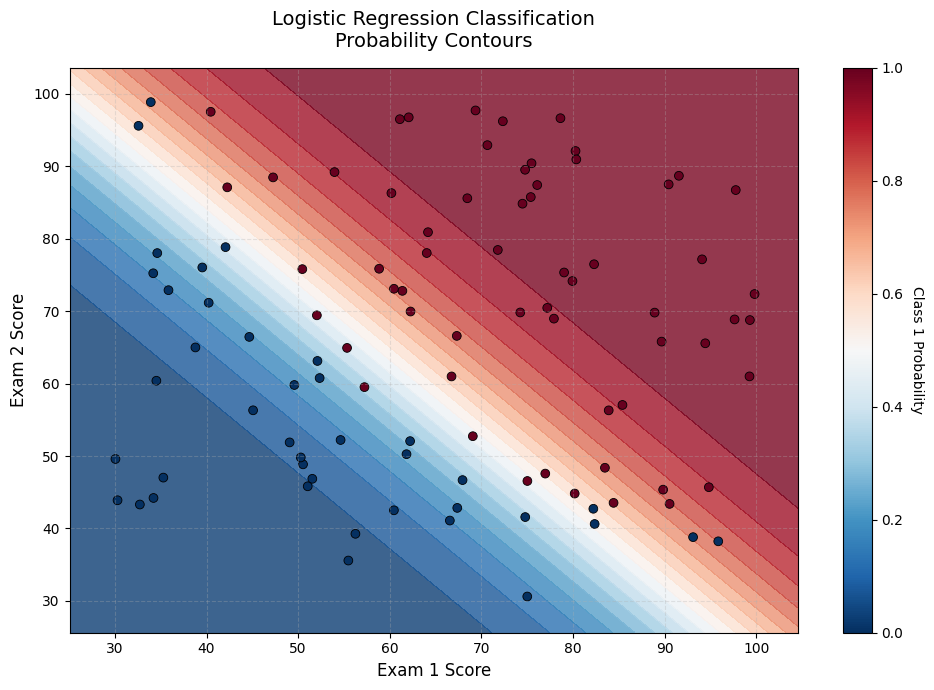

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 加载数据
data = np.loadtxt('data3/data3.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2].astype(int)

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 训练逻辑回归模型
model = LogisticRegression(solver='lbfgs')
model.fit(X_scaled, y)

# 生成网格数据（原始特征空间）
h = 0.5  # 网格精度
x_min, x_max = X[:, 0].min()-5, X[:, 0].max()+5
y_min, y_max = X[:, 1].min()-5, X[:, 1].max()+5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 预测网格概率值（需要标准化）
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_scaled = scaler.transform(mesh_points)
Z = model.predict_proba(mesh_points_scaled)[:, 1]
Z = Z.reshape(xx.shape)

# 可视化设置
plt.figure(figsize=(10, 7), dpi=100)
plt.contourf(xx, yy, Z, alpha=0.8, levels=20, cmap=plt.cm.RdBu_r)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolors='k', 
            cmap=plt.cm.RdBu_r, linewidths=0.6)

# 标注学术化格式
plt.xlabel('Exam 1 Score', fontsize=12)
plt.ylabel('Exam 2 Score', fontsize=12)
plt.title('Logistic Regression Classification\nProbability Contours', 
          fontsize=14, pad=15)
cbar = plt.colorbar()
cbar.set_label('Class 1 Probability', rotation=270, labelpad=15)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()

# 显示图表
plt.show()

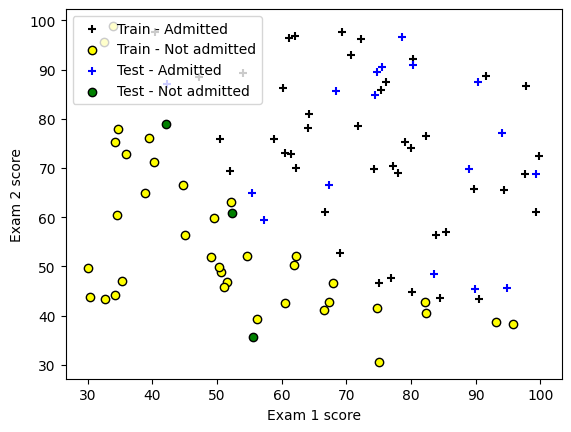

训练集准确率: 100.0%
测试集准确率: 100.0%
逻辑回归方程：
\[P(y=1) = rac{1}{1 + e^{-(-0.5926 + -0.5926 * 1 + -16.8192 * x2 + -18.3530 * x2 + 0.0251 * x2^2 + 0.5433 * x2 x2 + 0.0421 * x2^2)}}\]


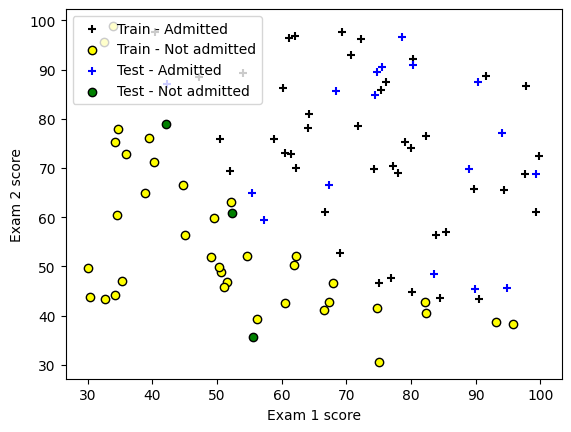

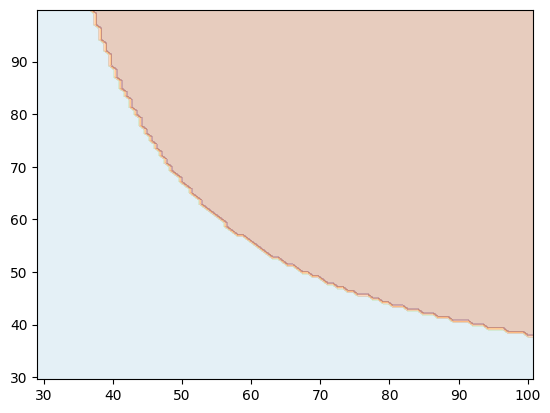

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

# 加载数据
data = np.loadtxt('data3/data3.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]

# 数据划分（前80%作为训练集，后20%作为测试集）
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# 可视化数据
def plot_data(X_train, y_train, X_test, y_test):
    # 绘制训练集
    admitted_train = X_train[y_train == 1]
    not_admitted_train = X_train[y_train == 0]
    plt.scatter(admitted_train[:, 0], admitted_train[:, 1], c='black', marker='+', label='Train - Admitted')
    plt.scatter(not_admitted_train[:, 0], not_admitted_train[:, 1], c='yellow', marker='o', edgecolors='black', label='Train - Not admitted')
    
    # 绘制测试集
    admitted_test = X_test[y_test == 1]
    not_admitted_test = X_test[y_test == 0]
    plt.scatter(admitted_test[:, 0], admitted_test[:, 1], c='blue', marker='+', label='Test - Admitted')
    plt.scatter(not_admitted_test[:, 0], not_admitted_test[:, 1], c='green', marker='o', edgecolors='black', label='Test - Not admitted')
    
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.show()

plot_data(X_train, y_train, X_test, y_test)

# 生成多项式特征
degree = 2  # 可逐步增加此值
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 创建并训练逻辑回归模型（关闭正则化）
model = LogisticRegression(
    penalty=None,         # 无正则化
    solver='lbfgs',       # 支持无正则化的求解器
    max_iter=10000        # 确保足够迭代次数
)
model.fit(X_train_poly, y_train)

# 验证训练集和测试集准确率
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"训练集准确率: {train_accuracy * 100}%")
print(f"测试集准确率: {test_accuracy * 100}%")

# 打印逻辑回归方程
def print_logistic_equation(model, poly):
    # 获取系数和截距
    coefficients = model.coef_[0]
    intercept = model.intercept_[0]
    
    # 获取多项式特征的名称
    feature_names = poly.get_feature_names_out()
    
    # 替换特征名称中的 x0 和 x1 为更直观的 x1 和 x2
    feature_names = [name.replace('x0', 'x1').replace('x1', 'x2') for name in feature_names]
    
    # 构建方程字符串
    equation = "P(y=1) = \frac{1}{1 + e^{-(" + f"{intercept:.4f}"
    for i in range(len(coefficients)):
        equation += f" + {coefficients[i]:.4f} * {feature_names[i]}"
    equation += ")}}"
    
    # 使用LaTeX格式打印方程
    print("逻辑回归方程：")
    print(f"\[{equation}\]")

print_logistic_equation(model, poly)

# 绘制决策边界
def plot_decision_boundary(model, X_train, y_train, X_test, y_test):
    plot_data(X_train, y_train, X_test, y_test)
    x1_min, x1_max = np.min([X_train[:, 0].min(), X_test[:, 0].min()]) - 1, np.max([X_train[:, 0].max(), X_test[:, 0].max()]) + 1
    x2_min, x2_max = np.min([X_train[:, 1].min(), X_test[:, 1].min()]) - 1, np.max([X_train[:, 1].max(), X_test[:, 1].max()]) + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
    X_grid = np.c_[xx1.ravel(), xx2.ravel()]
    X_grid_poly = poly.transform(X_grid)
    y_grid_pred = model.predict(X_grid_poly)
    plt.contourf(xx1, xx2, y_grid_pred.reshape(xx1.shape), alpha=0.3, cmap=plt.cm.Paired)
    plt.show()

plot_decision_boundary(model, X_train, y_train, X_test, y_test)